In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import flare_postfilter as pf

# Get data from data release to flares candidates

In [224]:
prediction_file = {
    'file_name':'min_proba_10_bins.csv',
    'predict_column': 'min_predict'
}
release_file = '/home/jupyter/mnt/s3/ztf-high-cadence-data/dr14_high_cadence.csv'

result = pf.get_data_from_release(prediction_file, release_file, threshold=0.99)
result.to_csv('min_proba_predict_data.csv')
result.head()

result dataframe=(25852, 6)


Data progress: 100%|█████████▉| 9728/9729 [4:05:45<00:01,  1.52s/it]


,oid,flare_start,predict_prob,time_series,ra,dec
0,486209100128243,58661.24208,0.995176,"[0.9182600000058301, 58661.24208, 18.142673, 0...",277.903961,6.109643
1,359210100044247,58811.44273,0.996085,"[5.9678899999998976, 58811.44273, 16.656197, 0...",105.324333,-8.860015
2,282213100119626,58691.23872,0.992881,"[0.9703300000037416, 58691.23872, 16.318787, 0...",275.966644,-21.185997
3,770213400069000,58461.14781,0.991000,"[0.039990000004763715, 58461.14781, 17.131294,...",336.497131,50.541885
4,688204300071099,58449.06803,0.995176,"[7.837149999999383, 58449.06803, 18.615862, 0....",310.082855,30.067356


# Search asteroids in flares candidates

In [3]:
result = pf.search_asteroids(result)
result.to_csv('min_proba_asteroids_post_filter.csv')
result.head()

,Unnamed: 0,oid,flare_start,predict_prob,time_series,ra,dec,asteroid,asteroid_time,asteroid_name
0,0,486209100128243,58661.24208,0.995176,"[0.9182600000058301, 58661.24208, 18.142673, 0...",277.903961,6.109643,False,58661.30098,No object
1,1,359210100044247,58811.44273,0.996085,"[5.9678899999998976, 58811.44273, 16.656197, 0...",105.324333,-8.860015,False,58811.46126,No object
2,2,282213100119626,58691.23872,0.992881,"[0.9703300000037416, 58691.23872, 16.318787, 0...",275.966644,-21.185997,False,58691.28075,No object
3,3,770213400069000,58461.14781,0.991000,"[0.039990000004763715, 58461.14781, 17.131294,...",336.497131,50.541885,False,58461.21144,No object
4,4,688204300071099,58449.06803,0.995176,"[7.837149999999383, 58449.06803, 18.615862, 0....",310.082855,30.067356,False,58449.17137,No object


In [4]:
result[result.asteroid].shape

(3900, 10)

## Compare with manual labels

In [15]:
labeled_df = pd.read_csv(
    'random_samples_min_proba_labeled.csv',
    sep=';',
    dtype={
    'oid': 'int64',
    'flare_start': 'float',
    'min_predict': 'float',
    'm_label': 'string'
})
labeled_df.head()

,oid,flare_start,min_predict,m_label
0,538215300072934,58658.26086,0.992881,defocusing
1,541206100090336,58341.26201,0.999315,asteroid
2,332212200167395,58637.36108,0.999133,asteroid
3,385202400036883,58293.36272,0.998215,asteroid
4,385203300127337,58719.17794,0.991000,defocusing


In [16]:
# get data for manual label oids
s_df = pd.merge(
    labeled_df[['oid', 'flare_start', 'm_label']],
    result[['oid', 'flare_start', 'predict_prob', 'time_series', 'ra', 'dec', 'asteroid', 'asteroid_name']],
    on=['oid', 'flare_start'],
    how='inner',
)
s_df.head()

,oid,flare_start,m_label,predict_prob,time_series,ra,dec,asteroid,asteroid_name
0,538215300072934,58658.26086,defocusing,0.992881,"[4.840060000002268, 58658.26086, 17.83841, 0.0...",276.167664,14.295973,False,No object
1,541206100090336,58341.26201,asteroid,0.999315,"[0.04716000000189524, 58341.26201, 18.047487, ...",299.964478,11.103843,True,2002 WQ6
2,332212200167395,58637.36108,asteroid,0.999133,"[28.87514999999985, 58637.36108, 18.805794, 0....",266.371735,-15.236836,True,2000 DW34
3,385202400036883,58293.36272,asteroid,0.998215,"[0.948499999998603, 58293.36272, 17.31565, 0.0...",288.673370,-13.307001,True,Abrarnadroo
4,385203300127337,58719.17794,defocusing,0.991000,"[0.9162500000020373, 58719.17794, 17.343807, 0...",286.659363,-12.873024,False,No object


In [19]:
print(f'amount labeled asteroids = {labeled_df[labeled_df.m_label=="asteroid"].shape[0]}')
print(f'amount autosearchded asteroids = {s_df[s_df.asteroid].shape[0]}')

amount labeled asteroids = 22
amount autosearchded asteroids = 22


In [20]:
aster_group = result.asteroid_name.value_counts()
aster_group[aster_group>1]

No object       21952
2000 DA69           6
2000 HM57           5
1989 SW8            4
2676 T-3            4
                ...  
2001 TN192          2
2004 RY315          2
Tokunaga            2
2003 UD258          2
Gainsborough        2
Name: asteroid_name, Length: 515, dtype: int64

# DEFOCUSING

## Sharpness

In [24]:
result = pd.read_csv('test_post_filter.csv')
sharpness_df = pf.get_sharpness(result)
sharpness_df.head()

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [05:20<00:00,  3.21s/it]


,Unnamed: 0,oid,flare_start,m_label,predict_prob,time_series,ra,dec,asteroid,time_maximum,asteroid_name,sharpness_flare_start,sharpness_time_maximum
0,0,538215300072934,58658.26086,defocusing,0.992881,"[4.840060000002268, 58658.26086, 17.83841, 0.0...",276.167664,14.295973,False,58658.31492,No object,-0.095,0.212
1,1,541206100090336,58341.26201,flare,0.999315,"[0.04716000000189524, 58341.26201, 18.047487, ...",299.964478,11.103843,True,58341.28139,2002 WQ6,-0.048,0.079
2,2,332212200167395,58637.36108,asteroid,0.999133,"[28.87514999999985, 58637.36108, 18.805794, 0....",266.371735,-15.236836,True,58637.38997,2000 DW34,0.000,0.048
3,3,385202400036883,58293.36272,asteroid,0.998215,"[0.948499999998603, 58293.36272, 17.31565, 0.0...",288.673370,-13.307001,True,58293.39653,Abrarnadroo,-0.058,-0.007
4,4,385203300127337,58719.17794,defocusing,0.991000,"[0.9162500000020373, 58719.17794, 17.343807, 0...",286.659363,-12.873024,False,58719.23762,No object,-0.015,0.013


In [18]:
sharpness_df['diff_sharpness'] = sharpness_df.sharpness_flare_start - sharpness_df.sharpness_time_maximum
sharpness_df.head()

,oid,flare_start,m_label,predict_prob,time_series,ra,dec,time_maximum,asteroid,asteroid_name,sharpness_flare_start,sharpness_time_maximum,diff_sharpness
0,538215300072934,58658.26086,defocusing,0.992881,"[4.840060000002268, 58658.26086, 17.83841, 0.0...",276.167664,14.295973,58658.31492,False,No object,-0.095,0.212,-0.307
1,541206100090336,58341.26201,flare,0.999315,"[0.04716000000189524, 58341.26201, 18.047487, ...",299.964478,11.103843,58341.28139,True,2002 WQ6,-0.048,0.079,-0.127
2,332212200167395,58637.36108,asteroid,0.999133,"[28.87514999999985, 58637.36108, 18.805794, 0....",266.371735,-15.236836,58637.38997,True,2000 DW34,0.000,0.048,-0.048
3,385202400036883,58293.36272,asteroid,0.998215,"[0.948499999998603, 58293.36272, 17.31565, 0.0...",288.673370,-13.307001,58293.39653,True,Abrarnadroo,-0.058,-0.007,-0.051
4,385203300127337,58719.17794,defocusing,0.991000,"[0.9162500000020373, 58719.17794, 17.343807, 0...",286.659363,-12.873024,58719.23762,False,No object,-0.015,0.013,-0.028


In [19]:
sharpness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   oid                     100 non-null    int64  
 1   flare_start             100 non-null    float64
 2   m_label                 90 non-null     object 
 3   predict_prob            100 non-null    float64
 4   time_series             100 non-null    object 
 5   ra                      100 non-null    float64
 6   dec                     100 non-null    float64
 7   time_maximum            100 non-null    float64
 8   asteroid                100 non-null    bool   
 9   asteroid_name           100 non-null    object 
 10  sharpness_flare_start   97 non-null     float64
 11  sharpness_time_maximum  97 non-null     float64
 12  diff_sharpness          97 non-null     float64
dtypes: bool(1), float64(8), int64(1), object(3)
memory usage: 9.6+ KB


In [31]:
n_bins = 20

<AxesSubplot:>

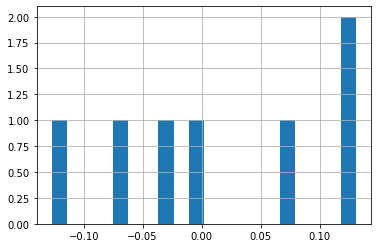

In [32]:
sharpness_df[sharpness_df.m_label=='flare']['diff_sharpness'].hist(bins=n_bins)

<AxesSubplot:>

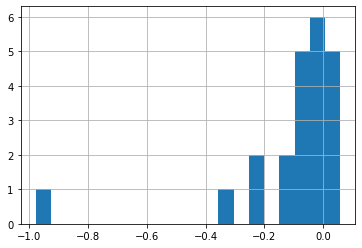

In [33]:
sharpness_df[sharpness_df.m_label=='defocusing']['diff_sharpness'].hist(bins=n_bins)

<AxesSubplot:>

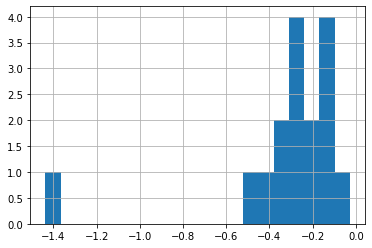

In [34]:
sharpness_df[sharpness_df.m_label=='ghost']['diff_sharpness'].hist(bins=n_bins)

<AxesSubplot:>

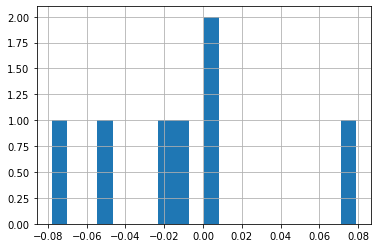

In [35]:
sharpness_df[sharpness_df.m_label=='flare']['sharpness_time_maximum'].hist(bins=n_bins)

<AxesSubplot:>

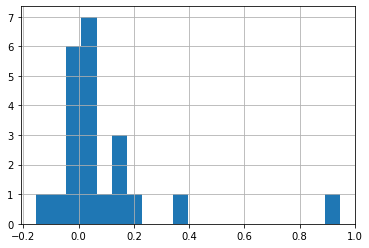

In [36]:
sharpness_df[sharpness_df.m_label=='defocusing']['sharpness_time_maximum'].hist(bins=n_bins)

<AxesSubplot:>

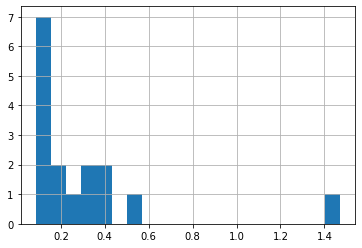

In [37]:
sharpness_df[sharpness_df.m_label=='ghost']['sharpness_time_maximum'].hist(bins=n_bins)

<AxesSubplot:>

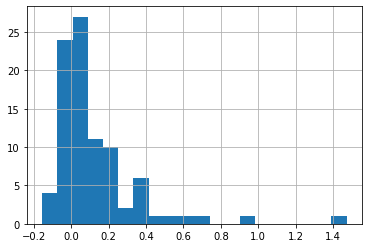

In [38]:
sharpness_df[sharpness_df.m_label!='flare']['sharpness_time_maximum'].hist(bins=n_bins)